In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadData(path, nrows=None):
    return pd.read_csv(path, nrows=nrows)

In [3]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataLondonUTD19 = loadData(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19.csv", nrows=1000000)

In [4]:
dataframeLondonUTD19 = pd.DataFrame(dataLondonUTD19)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [5]:
#Conzept Train/Test split
def split_data(df):
    test_set = pd.DataFrame()
    train_set = pd.DataFrame()

    # Group by day and sensor, Data should be sorted by day and detid, this is to make shure nothing is mixed up
    grouped = df.groupby(['day', 'detid'])

    for (day, sensor), group in grouped:
        # Randomly select 8 intervals
        intervals = np.random.choice(range(288), 8, replace=False) * 300
        test_indices = group.index[group['interval'].isin(intervals)]
        
        # Split into test and train sets
        test_set = pd.concat([test_set, group.loc[test_indices]])
        train_set = pd.concat([train_set, group.drop(test_indices)])

    return train_set, test_set

In [8]:
train_set, test_set = split_data(dataframeLondonUTD19)
df_test = pd.DataFrame(test_set)
df_train = pd.DataFrame(train_set)

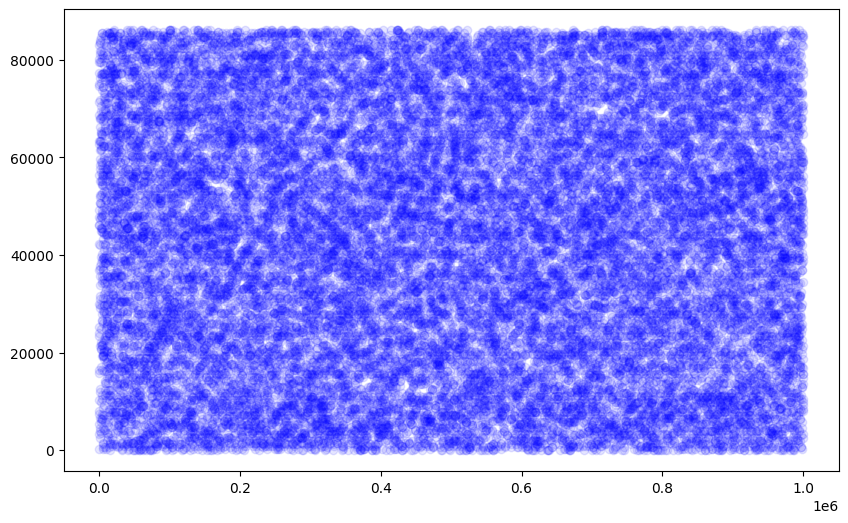

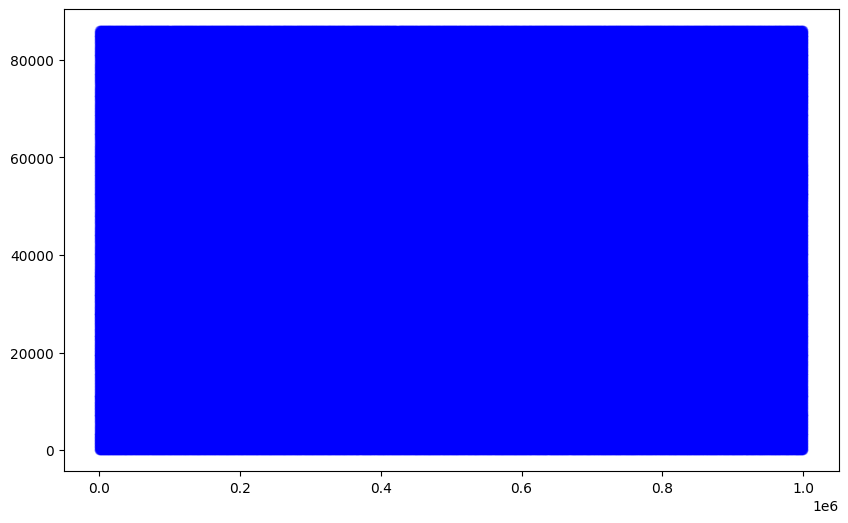

In [9]:
# Plot to check if the data is split correctly. Has no patterns
plt.figure(figsize=(10, 6))
plt.scatter(df_test.index, df_test['interval'], alpha=0.1, color='blue')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_train.index, df_train['interval'], alpha=0.1, color='blue')
plt.show()